In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

%matplotlib inline

In [2]:
dfUE = pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/relax_challenge/takehome_user_engagement.csv')
dfUsers = pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/relax_challenge/takehome_users.csv',encoding='latin-1')

In [3]:
dfUE.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
dfUsers.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
dfUsers=dfUsers.rename(columns = {'object_id':'user_id'})


In [6]:
# an Adopted User is one that has logged on 3 spearate days in at least one 7 day period
# object_id and user_id are common fields
# find out which users satisfy the 'adopted user' criteria and flag them in the dfUE

In [7]:
dfUE['freq'] = dfUE.groupby('user_id')['user_id'].transform('count')
dfUE.head()

,time_stamp,user_id,visited,freq
0,2014-04-22 03:53:30,1,1,1
1,2013-11-15 03:45:04,2,1,14
2,2013-11-29 03:45:04,2,1,14
3,2013-12-09 03:45:04,2,1,14
4,2013-12-25 03:45:04,2,1,14


In [8]:
(dfUE['user_id']==2).value_counts()

False    207903
True         14
Name: user_id, dtype: int64

In [9]:
dfUE.time_stamp.dtype

dtype('O')

In [10]:
dfUE['dateTime']=pd.to_datetime(dfUE['time_stamp'])

In [11]:
dfUE['week']=dfUE['dateTime'].dt.week
dfUE['day']=dfUE['dateTime'].dt.day
dfUE['year']=dfUE['dateTime'].dt.year

In [12]:
dfUE.head()

,time_stamp,user_id,visited,freq,dateTime,week,day,year
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,17,22,2014
1,2013-11-15 03:45:04,2,1,14,2013-11-15 03:45:04,46,15,2013
2,2013-11-29 03:45:04,2,1,14,2013-11-29 03:45:04,48,29,2013
3,2013-12-09 03:45:04,2,1,14,2013-12-09 03:45:04,50,9,2013
4,2013-12-25 03:45:04,2,1,14,2013-12-25 03:45:04,52,25,2013


In [13]:
dfAdoptedUsers=dfUE.groupby(['user_id','year','week'],as_index=False)['visited'].sum()

In [14]:
dfAdoptedUsers.head()

,user_id,year,week,visited
0,1,2014,17,1
1,2,2013,1,1
2,2,2013,46,1
3,2,2013,48,1
4,2,2013,50,1


In [15]:
dfAU = dfAdoptedUsers[dfAdoptedUsers['visited']>=3]


In [19]:
dfAU.loc[:,'AU']==1
None

In [20]:
#represents all users with 'adopted' status, map this back to the dfUsers using merge and then model
dfAU.head()

,user_id,year,week,visited,AU
7,2,2014,6,3,1
24,10,2013,9,3,1
30,10,2013,15,3,1
32,10,2013,17,3,1
33,10,2013,18,4,1


In [21]:
dfAU.user_id.nunique()

1444

In [22]:
dfNew = pd.merge(dfUsers,dfAU,how='left',on='user_id')

In [23]:
dfNew.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,week,visited,AU
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014.0,6.0,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN,NaN,NaN


In [24]:
dfNew.fillna(value=0)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,week,visited,AU
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0,0.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014.0,6.0,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0.0,0.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0.0,0.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0.0,0.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,0.0,0.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0.0,0.0,0.0,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,0.0,0.0,0.0,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,0.0,0.0,0.0,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013.0,9.0,3.0,1.0


In [25]:
# create dummy variables or coding for the strings

In [26]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44372 entries, 0 to 44371
Data columns (total 14 columns):
user_id                       44372 non-null int64
creation_time                 44372 non-null object
name                          44372 non-null object
email                         44372 non-null object
creation_source               44372 non-null object
last_session_creation_time    41195 non-null float64
opted_in_to_mailing_list      44372 non-null int64
enabled_for_marketing_drip    44372 non-null int64
org_id                        44372 non-null int64
invited_by_user_id            24583 non-null float64
year                          33816 non-null float64
week                          33816 non-null float64
visited                       33816 non-null float64
AU                            33816 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 5.1+ MB


In [27]:
dfNew['creation_dateTime'] = pd.to_datetime(dfNew.creation_time)

In [28]:
#add datetime versions of the original time stamps
dfNew.loc[:, 'weekday'] = dfNew['creation_dateTime'].dt.weekday
dfNew.loc[:, 'month'] = dfNew['creation_dateTime'].dt.month
dfNew.loc[:, 'year'] = dfNew['creation_dateTime'].dt.year
dfNew.loc[:, 'hour'] = dfNew['creation_dateTime'].dt.hour


In [29]:
dfNew

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,week,visited,AU,creation_dateTime,weekday,month,hour
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,NaN,NaN,NaN,2014-04-22 03:53:30,1,4,3
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,6.0,3.0,1.0,2013-11-15 03:45:04,4,11,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,NaN,NaN,NaN,2013-03-19 23:14:52,1,3,23
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,NaN,NaN,NaN,2013-05-21 08:09:28,1,5,8
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,NaN,NaN,NaN,2013-01-17 10:14:20,3,1,10
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,NaN,NaN,NaN,2013-12-17 03:37:06,1,12,3
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012,NaN,NaN,NaN,2012-12-16 13:24:32,6,12,13
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,2013,NaN,NaN,NaN,2013-07-31 05:34:02,2,7,5
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,2013,NaN,NaN,NaN,2013-11-05 04:04:24,1,11,4
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,9.0,3.0,1.0,2013-01-16 22:08:03,2,1,22


In [30]:
dfDummy = pd.get_dummies(dfNew['creation_source'])

In [31]:
dfDummy.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [32]:
dfNew=pd.concat([dfNew,dfDummy],axis=1)

In [33]:
dfNew.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,...,AU,creation_dateTime,weekday,month,hour,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,...,NaN,2014-04-22 03:53:30,1,4,3,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,...,1.0,2013-11-15 03:45:04,4,11,3,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,...,NaN,2013-03-19 23:14:52,1,3,23,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,...,NaN,2013-05-21 08:09:28,1,5,8,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,...,NaN,2013-01-17 10:14:20,3,1,10,1,0,0,0,0


In [34]:
dfModel = dfNew.drop(['creation_time','name','email','creation_source','creation_dateTime'],axis=1)

In [35]:
dfModel.fillna(value=0,inplace=True)

In [36]:
dfModel.head()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,week,visited,AU,weekday,month,hour,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,1.398139e+09,1,0,11,10803.0,2014,0.0,0.0,0.0,1,4,3,1,0,0,0,0
1,2,1.396238e+09,0,0,1,316.0,2013,6.0,3.0,1.0,4,11,3,0,1,0,0,0
2,3,1.363735e+09,0,0,94,1525.0,2013,0.0,0.0,0.0,1,3,23,0,1,0,0,0
3,4,1.369210e+09,0,0,1,5151.0,2013,0.0,0.0,0.0,1,5,8,1,0,0,0,0
4,5,1.358850e+09,0,0,193,5240.0,2013,0.0,0.0,0.0,3,1,10,1,0,0,0,0


# Random Forest Classifier

In [60]:
x = dfModel.drop(['AU','visited','last_session_creation_time','week','user_id'],axis=1)
y = dfModel['AU']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
predictionsRF = rfc.predict(X_test)

In [65]:
print(classification_report(y_test,predictionsRF))

             precision    recall  f1-score   support

        0.0       0.97      0.95      0.96      3105
        1.0       0.98      0.99      0.99     10207

avg / total       0.98      0.98      0.98     13312



In [66]:
confusion_matrix(y_test, predictionsRF)

array([[ 2939,   166],
       [   88, 10119]])

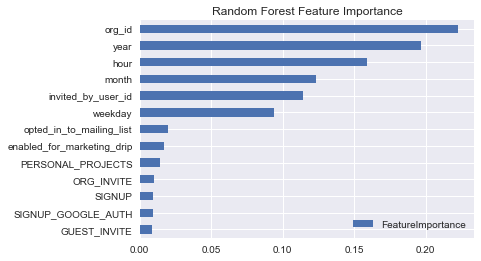

In [67]:
coefficientsRF = pd.DataFrame(rfc.feature_importances_,x.columns)
coefficientsRF.columns = ['FeatureImportance']
coefficientsRF=coefficientsRF.sort_values(by='FeatureImportance',ascending=True)
coefficientsRF.plot.barh()
plt.title('Random Forest Feature Importance')

**What can we learn from this in exploring the data?**

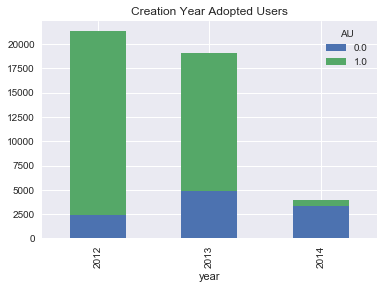

In [68]:
dfModel.groupby(['year','AU'])['AU'].size().unstack('AU').plot.bar(stacked=True)
plt.title('Creation Year Adopted Users')

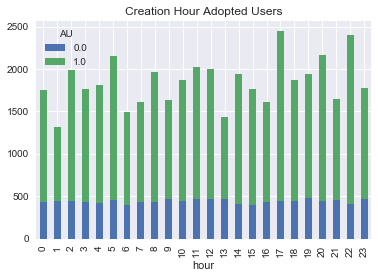

In [69]:
dfModel.groupby(['hour','AU'])['AU'].size().unstack('AU').plot.bar(stacked=True)
plt.title('Creation Hour Adopted Users')

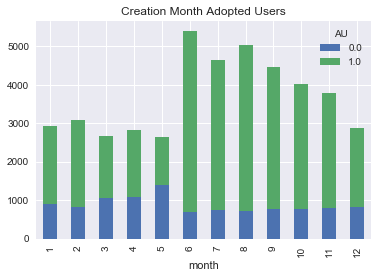

In [70]:
dfModel.groupby(['month','AU'])['AU'].size().unstack('AU').plot.bar(stacked=True)
plt.title('Creation Month Adopted Users')

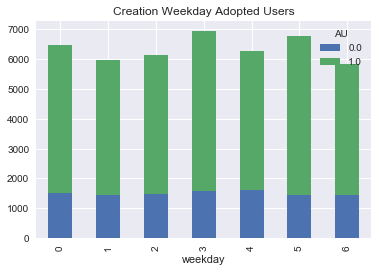

In [71]:
dfModel.groupby(['weekday','AU'])['AU'].size().unstack('AU').plot.bar(stacked=True)
plt.title('Creation Weekday Adopted Users')

In [76]:
dfUserInvites=dfModel.groupby(['invited_by_user_id','AU'],as_index=False)['AU'].size().sort_values(ascending=False)

In [77]:
dfUserInvites.describe()

count     3104.000000
mean        14.295103
std        281.006570
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      14833.000000
dtype: float64

In [78]:
dfModel.groupby(['year','month'])['month'].max()

year  month
2012  5         5
      6         6
      7         7
      8         8
      9         9
      10       10
      11       11
      12       12
2013  1         1
      2         2
      3         3
      4         4
      5         5
      6         6
      7         7
      8         8
      9         9
      10       10
      11       11
      12       12
2014  1         1
      2         2
      3         3
      4         4
      5         5
Name: month, dtype: int64